## Step 1: Import Required Libraries
We use Pandas and NumPy for data manipulation, Seaborn and Matplotlib for visualization, and sklearn for building and evaluating the logistic regression model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
sns.set(style="whitegrid")

## Step 2: Load the Diabetes Dataset
We use the Pima Indians Diabetes dataset. It includes various medical predictor variables and a binary target variable indicating diabetes presence.

In [2]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 3: Understand the Dataset
Check column data types and summary statistics to explore the dataset’s structure and look for potential anomalies.

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Step 4: Correlation Heatmap
This helps visualize the relationships between features and the target. Stronger correlations might be useful for prediction.

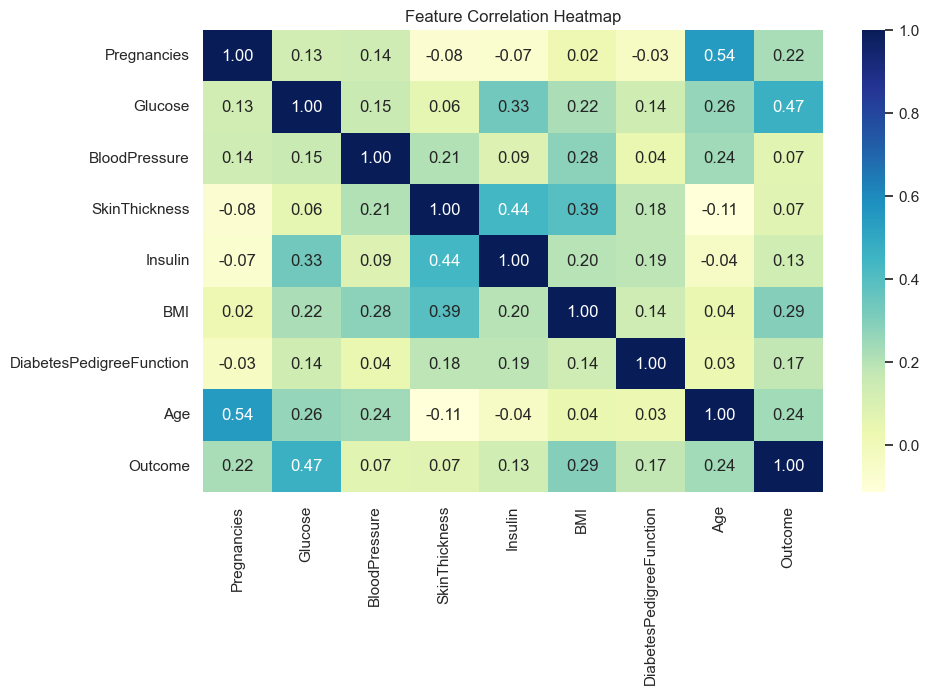

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 5: Split Features and Target
We separate the dataset into input features `X` and the target label `y` where 1 means diabetic and 0 means not.

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## Step 6: Train-Test Split
We split the data into 80% training and 20% testing to evaluate model performance on unseen data.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 7: Train Logistic Regression
We use Logistic Regression to train the model to predict the binary outcome.

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 8: Predictions
We predict the target variable on test data to evaluate model accuracy.

In [13]:
y_pred = model.predict(X_test)

## Step 9: Model Evaluation
We evaluate performance using accuracy, confusion matrix, and a detailed classification report with precision, recall, and F1-score.

In [14]:
acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {acc:.4f}")
print("\nConfusion Matrix:\n", conf_mat)
print("\nClassification Report:\n", report)

Accuracy Score: 0.7468

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Step 10: Visualize Confusion Matrix
This visualization helps in understanding the true vs predicted classification results.

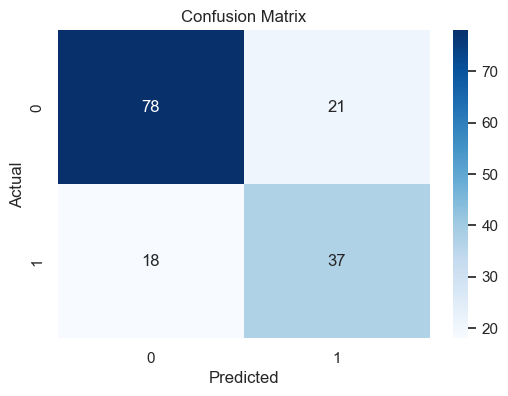

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()